In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from fleck import generate_spots, Stars

In [2]:
ld = [0.5079, 0.2239]
stars = Stars(spot_contrast=0.7, n_phases=30, u_ld=ld)
n_spots = 3
min_latitude = 70
spot_radius = 0.25
n_inclinations = 50000
lons, lats, rads, incs = generate_spots(min_latitude=min_latitude, max_latitude=90, n_spots=n_spots,
                                        spot_radius=spot_radius, n_inclinations=n_inclinations)
lcs = stars.light_curves(lons, lats, rads, incs)
smoothed_amps = 100 * lcs.ptp(axis=0)/2

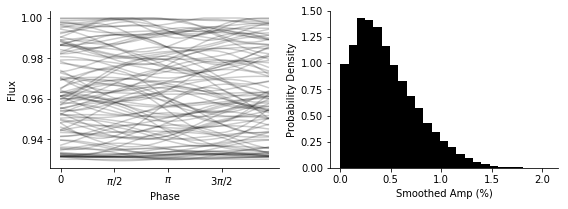

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(stars.phases, lcs[:, :100], color='k', alpha=0.2)
ax[0].set(xlabel='Phase', ylabel='Flux')
ticks = np.arange(0, 2*np.pi, 0.5*np.pi)
ax[0].set_xticks(ticks)
ax[0].set_xticklabels([0, '$\pi/2$', '$\pi$', '$3\pi/2$'])
ax[1].hist(smoothed_amps, bins=25, histtype='stepfilled', color='k', density=True)
ax[1].set(xlabel='Smoothed Amp (%)', ylabel='Probability Density')
fig.tight_layout()
for axis in ax: 
    for s in 'right top'.split(): 
        axis.spines[s].set_visible(False)
fig.savefig('plots/fleck_demo.pdf', bbox_inches='tight')
plt.show()